In [121]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [23]:
CURRENT_DIR = Path.cwd()
DATA_DIR = CURRENT_DIR / 'data'

Load Roster

In [24]:
roster = pd.read_csv(DATA_DIR / 'roster.csv',
            converters={"NetID": str.lower, "Email Address": str.lower},
            usecols=["Section", "Email Address", "NetID"],
            index_col="NetID")

In [25]:
roster.head(10)

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2
rxs30280,richard.saunders@univ.edu,1
dma58910,daisy.anderson@univ.edu,2
hsw06874,holly.watson@univ.edu,2
bkr19538,brandy.reilly@univ.edu,2


Load Homework Assignments and Exam Grades File

In [26]:
hw_exam_grades = pd.read_csv(
    DATA_DIR / 'hw_exam_grades.csv',
    converters={"SID": str.lower},
    usecols=lambda title: "Submission" not in title,
    index_col="SID"
)

In [27]:
hw_exam_grades.head(5)

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100


Load quiz grades

In [28]:
quiz_grades = pd.DataFrame()
for file_path in DATA_DIR.glob("quiz_*_grades.csv"):
    
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=['Email'],
        usecols=['Email', 'Grade']
    ).rename(columns={"Grade": quiz_name})
    
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)

In [29]:
quiz_grades.head(5)

,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
Email,,,,,
rachel.dennis@univ.edu,11,6,6,7,7
courtney.wolf@univ.edu,9,15,7,10,9
aaron.lester@univ.edu,8,9,8,6,10
ashley.martin@univ.edu,11,7,13,5,8
jessica.garza@univ.edu,10,8,11,8,16


In [31]:
final_df = pd.merge(roster, hw_exam_grades, left_index=True, right_index=True)

In [32]:
final_df.head(5)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100


In [33]:
final_df = pd.merge(final_df, quiz_grades, left_on='Email Address', right_index=True)

In [34]:
final_df.head(5)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,10,10,7,4,11
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,6,10,13,8,10
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,100,84,100,64,100,4,6,9,8,14
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,5,8,13,8,8
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,7,14,7,6,11


In [35]:
final_df = final_df.fillna(0)

In [36]:
final_df.head(5)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,10,10,7,4,11
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,6,10,13,8,10
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,84,100,64,100,4,6,9,8,14
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,5,8,13,8,8
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,7,14,7,6,11


### Calculate the three assessment types in the course:
1. Exams 
2. Homework
3. Quizzes

Each assessment type will be assigned a weight (percent of final grade) to get a final grade

#### Exam Grades

In [37]:
n_exams = 3
for n in range(1, n_exams + 1):
    final_df[f'Exam {n} Score'] = final_df[f'Exam {n}'] / final_df[f'Exam {n} - Max Points']

In [38]:
final_df.head(5)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,10,10,7,4,11,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,6,10,13,8,10,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,64,100,4,6,9,8,14,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,5,8,13,8,8,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,7,14,7,6,11,0.96,0.80,0.86


#### Homework Assignments

In [41]:
final_df[[x for x in final_df.columns if 'Home' in x and 'Max' in x]]

,Homework 1 - Max Points,Homework 2 - Max Points,Homework 3 - Max Points,Homework 4 - Max Points,Homework 5 - Max Points,Homework 6 - Max Points,Homework 7 - Max Points,Homework 8 - Max Points,Homework 9 - Max Points,Homework 10 - Max Points
wxb12345,80,80,80,100,70,90,50,70,60,60
mxl12345,80,80,80,100,70,90,50,70,60,60
txj12345,80,80,80,100,70,90,50,70,60,60
jgf12345,80,80,80,100,70,90,50,70,60,60
smj00936,80,80,80,100,70,90,50,70,60,60
...,...,...,...,...,...,...,...,...,...,...
pmj37756,80,80,80,100,70,90,50,70,60,60
dsl24347,80,80,80,100,70,90,50,70,60,60
nxe44872,80,80,80,100,70,90,50,70,60,60
bxr62103,80,80,80,100,70,90,50,70,60,60


Total Score and Homework Score Calculation

In [42]:
hw_max_cols = [x for x in final_df.columns if 'Home' in x and 'Max' in x]
hw_cols = [x for x in final_df.columns if 'Home' in x and 'Max' not in x]

In [48]:
hw_score_by_total = final_df[hw_cols].sum(axis=1) / final_df[hw_max_cols].sum(axis=1)

In [49]:
final_df['HW by Total'] = hw_score_by_total

In [51]:
final_df.head(5)

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,10,10,7,4,11,0.86,0.62,0.90,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,6,10,13,8,10,0.60,0.91,0.93,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,4,6,9,8,14,1.00,0.84,0.64,0.785135
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,5,8,13,8,8,0.72,0.83,0.77,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,7,14,7,6,11,0.96,0.80,0.86,0.782432


In [64]:
hw_max_data = final_df[hw_max_cols].set_axis(hw_cols ,axis=1)

In [65]:
hw_max_data

,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Homework 6,Homework 7,Homework 8,Homework 9,Homework 10
wxb12345,80,80,80,100,70,90,50,70,60,60
mxl12345,80,80,80,100,70,90,50,70,60,60
txj12345,80,80,80,100,70,90,50,70,60,60
jgf12345,80,80,80,100,70,90,50,70,60,60
smj00936,80,80,80,100,70,90,50,70,60,60
...,...,...,...,...,...,...,...,...,...,...
pmj37756,80,80,80,100,70,90,50,70,60,60
dsl24347,80,80,80,100,70,90,50,70,60,60
nxe44872,80,80,80,100,70,90,50,70,60,60
bxr62103,80,80,80,100,70,90,50,70,60,60


In [66]:
hw_score_by_avg = (final_df[hw_cols] / hw_max_data).sum(axis=1) / len(hw_cols)

In [67]:
final_df['HW by Average'] = hw_score_by_avg

In [68]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,10,7,4,11,0.86,0.62,0.90,0.808108,0.799405
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,6,10,13,8,10,0.60,0.91,0.93,0.827027,0.818944
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,4,6,9,8,14,1.00,0.84,0.64,0.785135,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,5,8,13,8,8,0.72,0.83,0.77,0.770270,0.765710
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,7,14,7,6,11,0.96,0.80,0.86,0.782432,0.787742


In [70]:
final_df['Homework Score'] = final_df[['HW by Total', 'HW by Average']].max(axis=1)

In [71]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average,Homework Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,7,4,11,0.86,0.62,0.90,0.808108,0.799405,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,13,8,10,0.60,0.91,0.93,0.827027,0.818944,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,6,9,8,14,1.00,0.84,0.64,0.785135,0.785940,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,13,8,8,0.72,0.83,0.77,0.770270,0.765710,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,14,7,6,11,0.96,0.80,0.86,0.782432,0.787742,0.787742


#### Quiz Score

In [74]:
quiz_scores = final_df.filter(regex=r"^Quiz \d$", axis=1)

In [75]:
n_quiz = quiz_scores.shape[1]

In [76]:
quiz_max_points = pd.Series(
    {'Quiz 1': 11, 'Quiz 2':15, 'Quiz 3': 17, 'Quiz 4': 14, 'Quiz 5': 12}
)

In [78]:
quiz_score_by_total = quiz_scores.sum(axis=1) / quiz_max_points.sum()

In [80]:
quiz_score_by_avg = (quiz_scores / quiz_max_points).sum(axis=1) / n_quiz

In [81]:
final_df['Quiz Score'] = pd.concat([quiz_score_by_total, quiz_score_by_avg], axis=1).max(axis=1)

In [82]:
final_df.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,HW by Total,HW by Average,Homework Score,Quiz Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,7,4,11,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,13,8,10,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.682149
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,9,8,14,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,13,8,8,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.615286
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,7,6,11,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.652174


### Final Grade

In [84]:
weights = pd.Series(
    {
        'Exam 1 Score': 0.05,
        'Exam 2 Score': 0.10,
        'Exam 3 Score': 0.15,
        'Quiz Score': 0.30,
        'Homework Score': 0.40
    }
)

In [87]:
final_df['Final Score'] = (final_df[weights.index] * weights).sum(axis=1)

In [89]:
final_df['Ceiling Score'] = np.ceil(final_df['Final Score'] * 100)

In [90]:
def get_letter_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

In [94]:
letter_grades = final_df['Ceiling Score'].map(get_letter_grade)

In [95]:
final_df['Final Grade'] = pd.Categorical(
    letter_grades, categories=['F', 'D', 'C', 'B', 'A'], ordered=True
)

In [96]:
final_df['Final Grade']

wxb12345    C
mxl12345    B
txj12345    C
jgf12345    C
smj00936    C
           ..
pmj37756    B
dsl24347    C
nxe44872    C
bxr62103    C
jxw53347    C
Name: Final Grade, Length: 150, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

In [97]:
cols_to_write = ['Last Name', 'First Name', 'Email Address', 'Ceiling Score', 'Final Grade']

In [105]:
for section, df in final_df.groupby('Section'):
    section_file = DATA_DIR / f'section_{section}_grades.csv'
    df[cols_to_write].sort_values(by=['Last Name', 'First Name']).to_csv(section_file)

In [106]:
final_df['Final Grade'].value_counts()

Final Grade
C    102
B     42
D      6
F      0
A      0
Name: count, dtype: int64

In [117]:
grade_counts = final_df['Final Grade'].value_counts().sort_index()

<Axes: xlabel='Final Grade'>

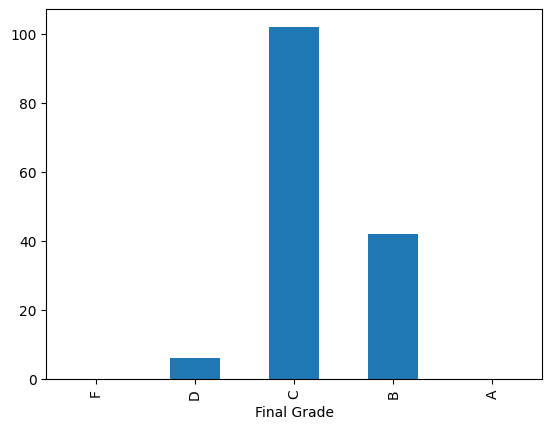

In [118]:
grade_counts.plot.bar()

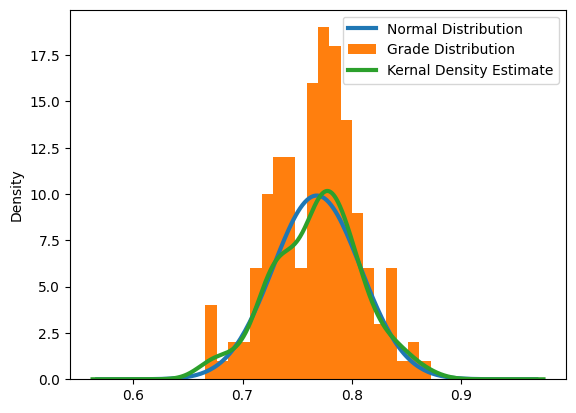

In [125]:
grade_mean = final_df['Final Score'].mean()
grade_std = final_df['Final Score'].std()

x = np.linspace(grade_mean - 5*grade_std, grade_mean + 5*grade_std, 200)
y = scipy.stats.norm.pdf(x, loc=grade_mean, scale=grade_std)

plt.plot(x, y, label = 'Normal Distribution', linewidth = 3)
final_df['Final Score'].plot.hist(bins=20, label='Grade Distribution' )

final_df['Final Score'].plot.density(
    linewidth=3, label='Kernal Density Estimate'
)

plt.legend()